In [2]:
import pickle

import numpy as np

import interaction_constants
from qubit_system.geometry.regular_lattice_1d import RegularLattice1D
from qubit_system.qubit_system_classes import StaticQubitSystem, EvolvingQubitSystem
from qubit_system.utils.ghz_states import StandardGHZState
from qubit_system.utils.interpolation import get_hamiltonian_coeff_linear_interpolation
from reinforcement_learning.cleanup import Protocol

In [2]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=False)
plt.rc('font', family="serif", serif="CMU Serif")

In [3]:
N_RYD = 50
C6 = interaction_constants.get_C6(N_RYD)

LATTICE_SPACING = 1.5e-6

print(f"C6: {C6:.3e}")
print(f"Characteristic V: {C6 / (LATTICE_SPACING ** 6):.3e} Hz")

t = 2e-6

C6: 1.555e-26
Characteristic V: 1.365e+09 Hz


# Achieving GHZ States in Evolving Systems

In [4]:
def solve_and_print_stats(e_qs: EvolvingQubitSystem):
    import time
    start_time = time.time()
    e_qs.solve()
    print(f"solved in {time.time() - start_time:.3f}")

    fidelity_with_ghz = e_qs.get_fidelity_with("ghz")
    fidelity_with_ghz_asymmetric = e_qs.get_fidelity_with("ghz_antisymmetric")
    print(f"fidelity with GHZ: {fidelity_with_ghz:.4f} (with antisymmetric: {fidelity_with_ghz_asymmetric:.4f})")
    fidelity_with_ground = e_qs.get_fidelity_with("ground")
    fidelity_with_excited = e_qs.get_fidelity_with("excited")
    superposition_probability = fidelity_with_ground + fidelity_with_excited
    print(f"superposition probability: {superposition_probability:.4f} (g: {fidelity_with_ground:.4f}, e: {fidelity_with_excited:.4f})")
    e_qs.plot(with_antisymmetric_ghz=True)

## $N = 2$


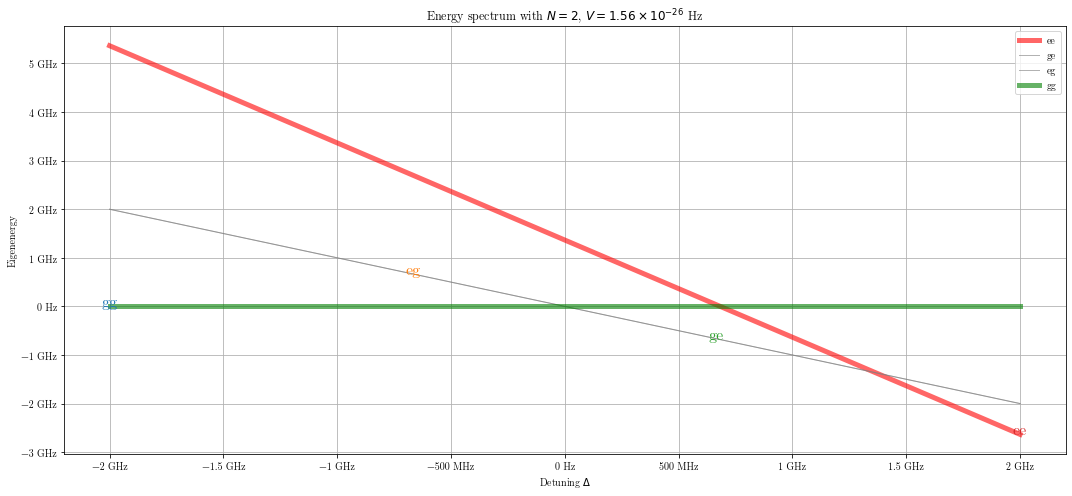

In [5]:
N = 2
s_qs_n_2 = StaticQubitSystem(
    N=N, V=C6,
    geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=0, Delta=np.linspace(-2e9, 2e9, 2 ** N)
)
s_qs_n_2.plot_detuning_energy_levels(True, savefig_name="d_3_s_qs_n_2.png")

### Manual optimisation


fidelity with GHZ: 0.0708 (with antisymmetric: 0.9292)
superposition probability: 1.0000 (g: 0.4995, e: 0.5005)



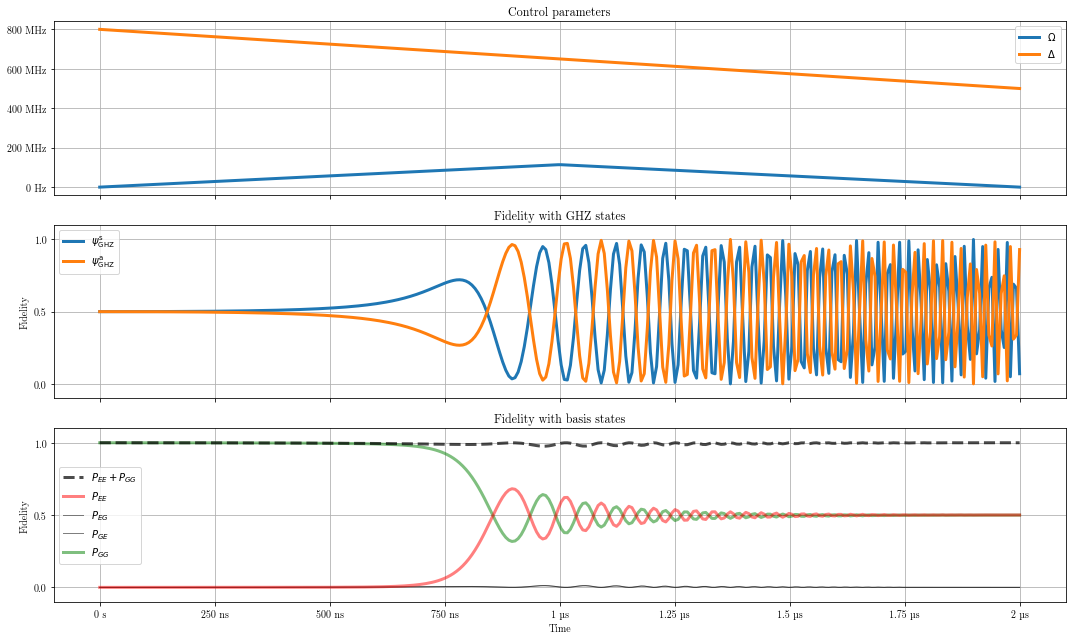

In [6]:
N = 2
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 2, t], [0, 114e6, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [800e6, 500e6]),
    t_list=np.linspace(0, t, 300),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)

### Reinforcement learning optimisation

fidelity with GHZ: 0.9975 (with asymmetric: 0.0013)
superposition probability: 0.9988 (g: 0.4810, e: 0.5177)


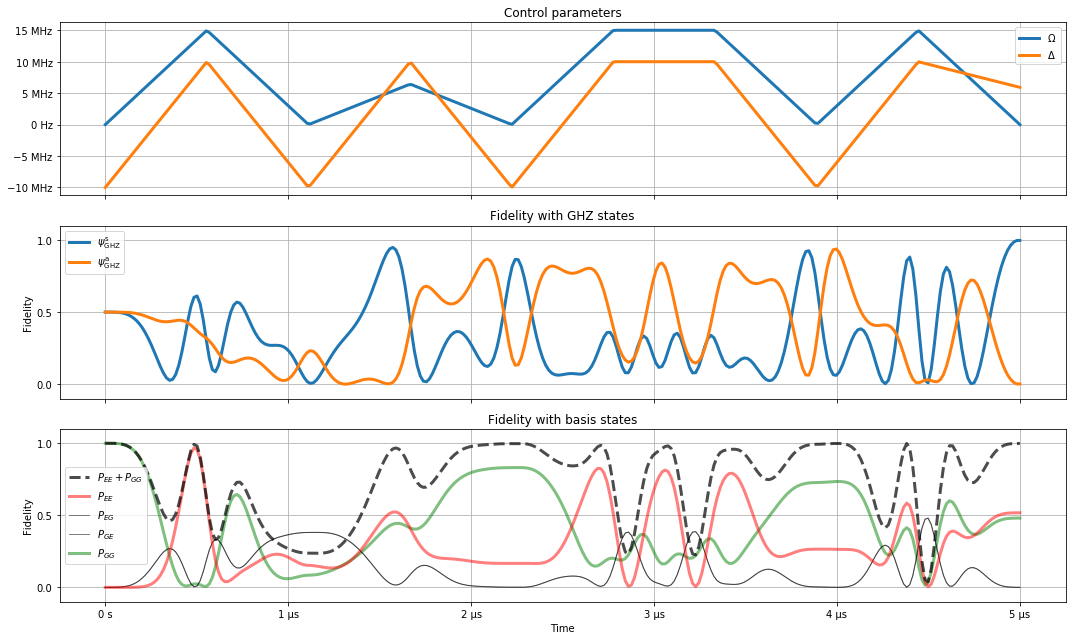

In [66]:
with open("reinforcement_learning/results/20190803_154019.pkl", "rb") as f:
    data = pickle.load(f)
    
t_list = data['evolving_qubit_system_kwargs']['t_list']
solve_t_list = np.linspace(t_list[0], t_list[-1], 300)

data['evolving_qubit_system_kwargs'].pop('t_list')
e_qs = EvolvingQubitSystem(
    **data['evolving_qubit_system_kwargs'],
    Omega=get_hamiltonian_coeff_linear_interpolation(
        t_list,
        data['protocol'].Omega,
    ),
    Delta=get_hamiltonian_coeff_linear_interpolation(
        t_list,
        data['protocol'].Delta,
    ),
    t_list=solve_t_list,
)
solve_and_print_stats(e_qs)

## $N = 4$

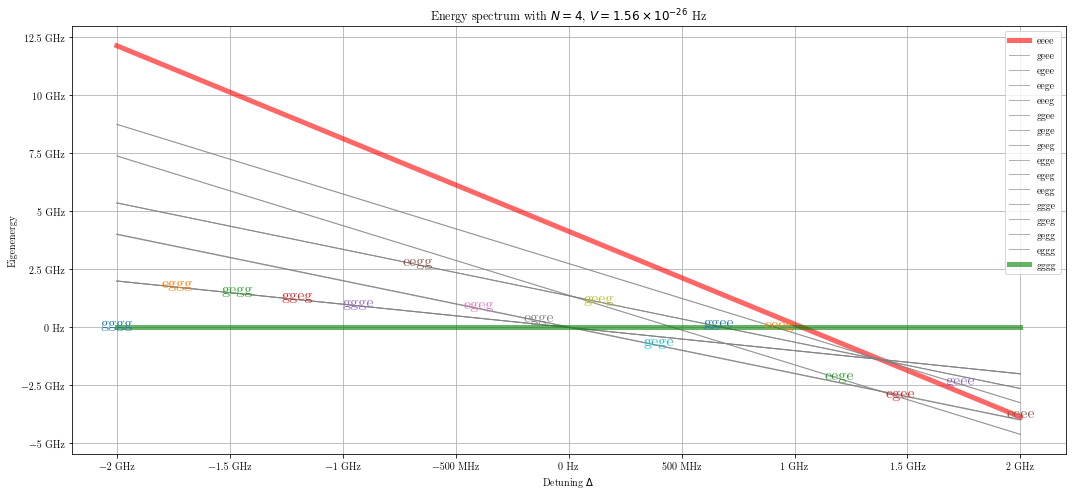

In [7]:
N = 4
s_qs_n_4 = StaticQubitSystem(
    N=N, V=C6,
    geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=0, Delta=np.linspace(-2e9, 2e9, 2 ** N)
)
s_qs_n_4.plot_detuning_energy_levels(True, savefig_name="d_3_s_qs_n_4.png")

### Manual optimisation

solved in 1.516
fidelity with GHZ: 0.9511 (with antisymmetric: 0.0488)
superposition probability: 1.0000 (g: 0.5000, e: 0.5000)



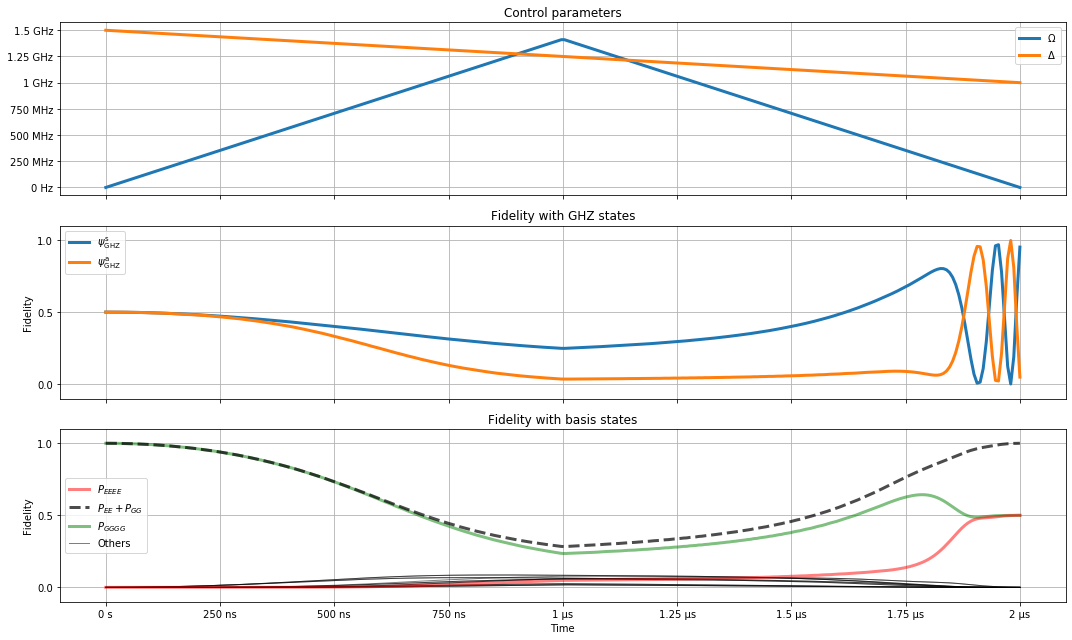

In [5]:
N = 4
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 2, t], [0, 1.4148e9, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1.5e9, 1e9]),
    t_list=np.linspace(0, t, 300),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)

### Reinforcement learning optimisation

In [9]:
with open("reinforcement_learning/results/20190803_141955.pkl", "rb") as f:
    data = pickle.load(f)
    
t_list = data['evolving_qubit_system_kwargs']['t_list']
solve_t_list = np.linspace(t_list[0], t_list[-1], 300)

data['evolving_qubit_system_kwargs'].pop('t_list')
e_qs = EvolvingQubitSystem(
    **data['evolving_qubit_system_kwargs'],
    Omega=get_hamiltonian_coeff_linear_interpolation(
        t_list,
        data['protocol'].Omega,
    ),
    Delta=get_hamiltonian_coeff_linear_interpolation(
        t_list,
        data['protocol'].Delta,
    ),
    t_list=solve_t_list,
)
e_qs.solve()
N = data['evolving_qubit_system_kwargs']['N']
e_qs.plot(with_antisymmetric_ghz=get_ghz_state(N, False))
fidelity_with_ghz = e_qs.get_fidelity_with("ghz")
fidelity_with_ghz_asymmetric = e_qs.get_fidelity_with(get_ghz_state(N, False))
print(f"fidelity with GHZ: {fidelity_with_ghz:.4f} (with asymmetric: {fidelity_with_ghz_asymmetric:.4f})")
fidelity_with_ground = e_qs.get_fidelity_with("ground")
fidelity_with_excited = e_qs.get_fidelity_with("excited")
superposition_probability = fidelity_with_ground + fidelity_with_excited
print(f"superposition probability: {superposition_probability:.4f} (g: {fidelity_with_ground:.4f}, e: {fidelity_with_excited:.4f})")

NameError: name 'get_ghz_state' is not defined

## $N = 6$

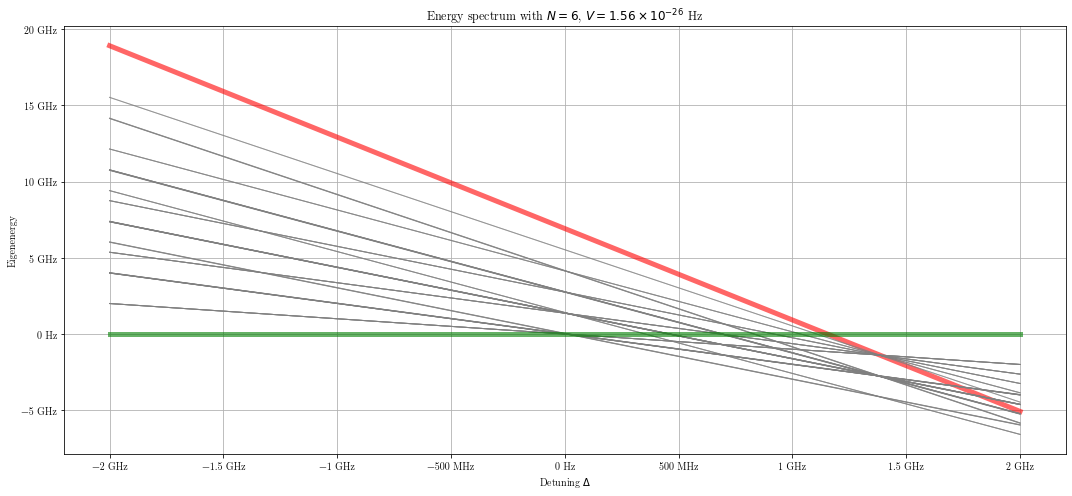

In [10]:
N = 6
s_qs_n_4 = StaticQubitSystem(
    N=N, V=C6,
    geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=0, Delta=np.linspace(-2e9, 2e9, 2 ** N)
)
s_qs_n_4.plot_detuning_energy_levels(False, savefig_name="d_3_s_qs_n_6.png")

### Manual optimisation

fidelity with GHZ: 0.0970 (with antisymmetric: 0.9030)
superposition probability: 1.0000 (g: 0.4999, e: 0.5001)



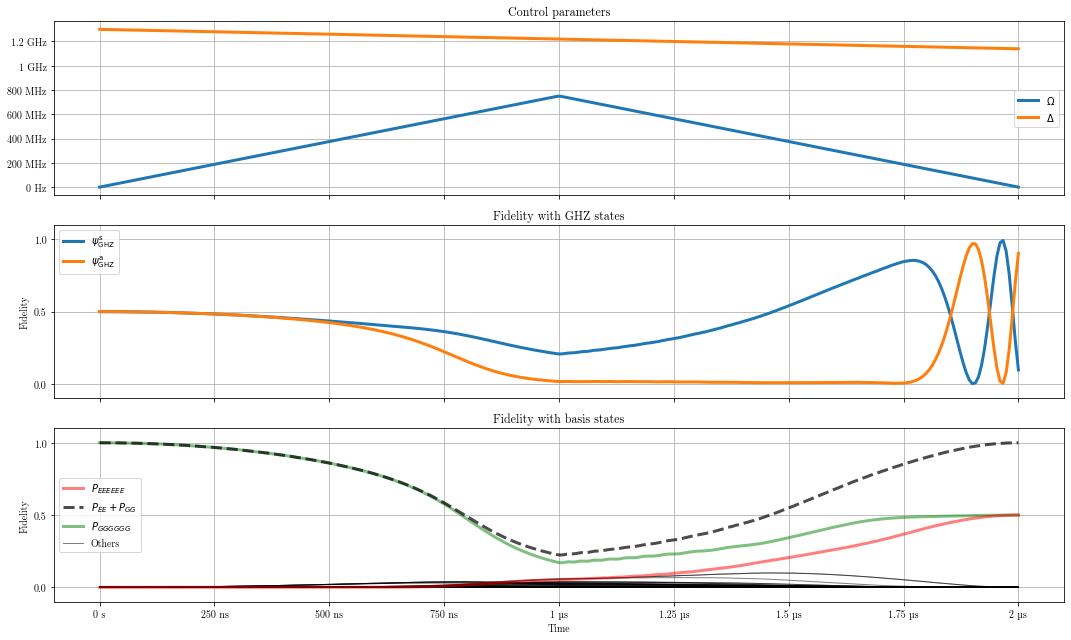

In [11]:
N = 6
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 2, t], [0, 751.23e6, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1.3e9, 1.14e9]),
    t_list=np.linspace(0, t, 300),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)

## $N = 8$

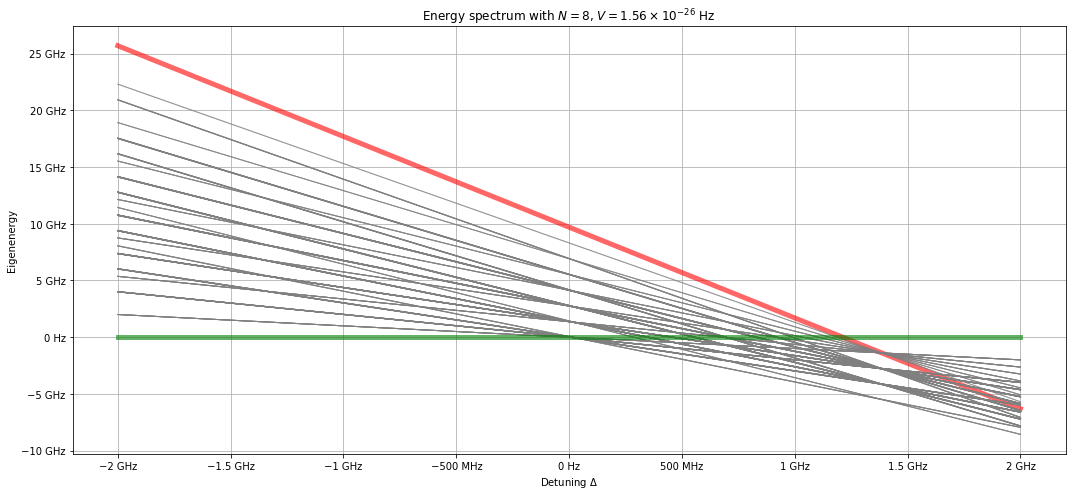

In [110]:
N = 8
s_qs_n_4 = StaticQubitSystem(
    N=N, V=C6,
    geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=0, Delta=np.linspace(-2e9, 2e9, 2 ** N)
)
s_qs_n_4.plot_detuning_energy_levels(False, savefig_name="d_3_s_qs_n_8.png")

### Manual optimisation

KeyboardInterrupt: 

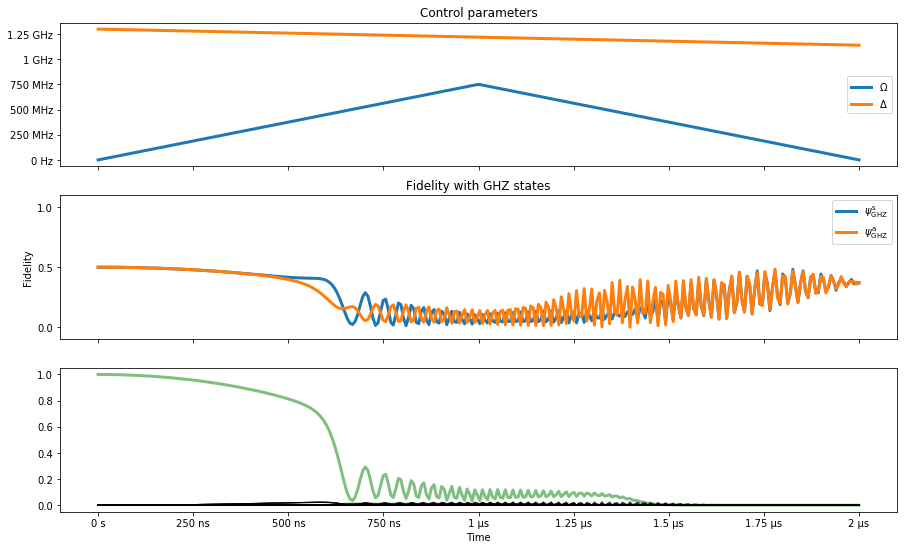

In [111]:
N = 8
e_qs = EvolvingQubitSystem(
    N=N, V=C6, geometry=RegularLattice1D(spacing=LATTICE_SPACING),
    Omega=get_hamiltonian_coeff_linear_interpolation([0, t / 2, t], [0, 751.23e6, 0]),
    Delta=get_hamiltonian_coeff_linear_interpolation([0, t], [1.3e9, 1.14e9]),
    t_list=np.linspace(0, t, 300),
    ghz_state=StandardGHZState(N)
)
solve_and_print_stats(e_qs)